In [2]:
#Nödvändiga importer för kunskapskontroll AdventureWorks
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
from sqlalchemy import create_engine

In [3]:
#Engine skapas
engine = create_engine('mssql://BUCKIE2/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server')
connection = engine.connect()

In [19]:
pd.options.display.float_format = '{:,.0f}'.format

In [20]:
#Topp kategorin av produkter över hela historiken 2011-2014
#Skalbar query som går att skala till valfri granularitet i produktindelning och valfri tidsperiod.
query_desc = """WITH PCTE AS 
	(SELECT
	A.ProductID,A.ProductSubcategoryID, A.Name AS Level1,
	B.ProductCategoryID,				B.Name AS Level2,
										C.Name AS Level3
	FROM
	Production.Product AS A
	LEFT JOIN Production.ProductSubcategory AS B ON A.ProductSubcategoryID=B.ProductSubcategoryID
	LEFT JOIN Production.ProductCategory AS C ON B.ProductCategoryID=C.ProductCategoryID)
SELECT 
	A.Level3,
	AVG(B.UnitPrice) AS 'USD Pris',
	Sum(B.OrderQty) AS Kvantitet,
	sum(B.LineTotal) AS 'USD Försäljning'

FROM PCTE AS A
LEFT JOIN Sales.SalesOrderDetail AS B ON A.ProductID = B.ProductID
LEFT JOIN Sales.SalesOrderHeader AS C ON B.SalesorderID = C.SalesorderID
WHERE  C.OrderDate>='2010-01-01' 
		AND C.OrderDate<='2014-12-31'
GROUP BY A.ProductCategoryID,A.Level3
ORDER BY [USD Pris] DESC
"""
pd.read_sql(query_desc, con=connection)

,Level3,USD Pris,Kvantitet,USD Försäljning
0,Bikes,"1,255",90268,"94,651,173"
1,Components,251,49044,"11,802,593"
2,Clothing,32,73670,"2,120,543"
3,Accessories,20,61932,"1,272,073"


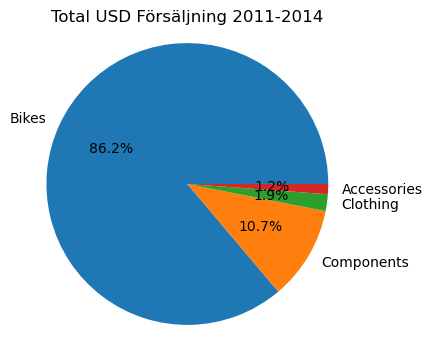

In [12]:
#Pie chart för att tydligt visa vilka produktkategorier som betyder mest
categories =['Bikes','Components','Clothing','Accessories']
total_försäljning= [94651173, 11802593, 2120543, 1272073]

plt.figure(figsize=(4,4))
plt.pie(total_försäljning , labels=categories, autopct='%1.1f%%')
plt.title('Total USD Försäljning 2011-2014')
plt.axis('equal')

plt.show()

In [24]:
 query_2 = """WITH PCTE AS 
	(SELECT
	A.ProductID,A.ProductSubcategoryID, A.Name AS Level1,
	B.ProductCategoryID,				B.Name AS Level2,
										C.Name AS Level3
	FROM
	Production.Product AS A
	LEFT JOIN Production.ProductSubcategory AS B ON A.ProductSubcategoryID=B.ProductSubcategoryID
	LEFT JOIN Production.ProductCategory AS C ON B.ProductCategoryID=C.ProductCategoryID)
SELECT 
	A.Level3,
	AVG(B.UnitPrice) AS 'USD Pris',
	Sum(B.OrderQty) AS Kvantitet,
	sum(B.LineTotal) AS 'USD Försäljning'

FROM PCTE AS A
LEFT JOIN Sales.SalesOrderDetail AS B ON A.ProductID = B.ProductID
LEFT JOIN Sales.SalesOrderHeader AS C ON B.SalesorderID = C.SalesorderID
WHERE  C.OrderDate>='2012-07-01' 
		AND C.OrderDate<='2013-06-30'
GROUP BY A.ProductCategoryID,A.Level3
ORDER BY [USD Pris] DESC
"""



In [25]:
query_3 = """WITH PCTE AS 
	(SELECT
	A.ProductID,A.ProductSubcategoryID, A.Name AS Level1,
	B.ProductCategoryID,				B.Name AS Level2,
										C.Name AS Level3
	FROM
	Production.Product AS A
	LEFT JOIN Production.ProductSubcategory AS B ON A.ProductSubcategoryID=B.ProductSubcategoryID
	LEFT JOIN Production.ProductCategory AS C ON B.ProductCategoryID=C.ProductCategoryID)
SELECT 
	A.Level3,
	AVG(B.UnitPrice) AS 'USD Pris',
	Sum(B.OrderQty) AS Kvantitet,
	sum(B.LineTotal) AS 'USD Försäljning'

FROM PCTE AS A
LEFT JOIN Sales.SalesOrderDetail AS B ON A.ProductID = B.ProductID
LEFT JOIN Sales.SalesOrderHeader AS C ON B.SalesorderID = C.SalesorderID
WHERE  C.OrderDate>='2013-07-01' 
		AND C.OrderDate<='2014-06-30'
GROUP BY A.ProductCategoryID,A.Level3
ORDER BY [USD Pris] DESC

"""



In [26]:
#variabler skapas för de båda åren 2013 och 2014 inom Level 3 (toppkategorin "grövsta produktkategorin")
#x står för grövsta kategorin, sedan y för mellankategorin och z för den mest granulära kategorin i namngivningen
#av senare variabler.
#Detta kan tyckas vara ett onödigt steg men kan vara viktigt om jag vill bygga vidare på denna kod och det underlättar
#dokumentationen. (tre nivåer: x,y,z) (två år: 13,14)
x13=pd.read_sql(query_2, con=connection)
x14=pd.read_sql(query_3, con=connection)

In [66]:
pd.read_sql(query_2, con=connection)
#De fyra kategorierna i Level3 för helåret Juli 2012 t.o.m Juni 2013.Målet är att göra en YoY analys. (R12 mot R12)

,Level3,USD Pris,Kvantitet,USD Försäljning
0,Bikes,"1,092.2",31958,"29,099,775.7"
1,Components,248.6,20613,"4,880,085.9"
2,Clothing,30.6,27355,"792,738.0"
3,Accessories,19.7,10012,"197,163.7"


In [27]:
pd.read_sql(query_3, con=connection)
#De fyra kategorierna i Level3 för helåret Juli 2013 t.o.m Juni 2014.

,Level3,USD Pris,Kvantitet,USD Försäljning
0,Bikes,"1,194",37070,"38,462,303"
1,Components,221,20290,"4,448,145"
2,Clothing,34,36374,"1,085,073"
3,Accessories,20,48338,"1,009,064"


In [28]:
x14.set_index('Level3').subtract(x13.set_index('Level3'), fill_value=0)
#förändring 2013 till 2014.YoY  Absolut förndring i Varje Kategori i Level3 där jag letar viktiga förändringar.

,USD Pris,Kvantitet,USD Försäljning
Level3,,,
Bikes,102,5112,"9,362,528"
Components,-28,-323,"-431,941"
Clothing,3,9019,"292,335"
Accessories,0,38326,"811,901"


In [236]:
#Bikes och Accessories har haft det bästa året, Bikes pga Pris OCH Kvantitetsförbättring och accessoarer pga en nästan 
#femdubbling av kvantiteten. Nästa steg är att söka mer granulärt i dessa faktorer. Vad är huvudfaktorerna inom Bikes 
#och accessoarer till denna förbättring? (Ingen stor produktkategori uppvisar stor försämring).  

In [51]:
#variabler för andra kategorin (y) för de två åren 2013,2014
y13=pd.read_sql(query_4, con=connection)
y14=pd.read_sql(query_5, con=connection)

In [34]:
query_4 = """WITH PCTE AS 
	(SELECT
	A.ProductID,A.ProductSubcategoryID, A.Name AS Level1,
	B.ProductCategoryID,				B.Name AS Level2,
										C.Name AS Level3
	FROM
	Production.Product AS A
	LEFT JOIN Production.ProductSubcategory AS B ON A.ProductSubcategoryID=B.ProductSubcategoryID
	LEFT JOIN Production.ProductCategory AS C ON B.ProductCategoryID=C.ProductCategoryID)
SELECT 
	A.Level2,
	AVG(B.UnitPrice) AS 'USD Pris',
	Sum(B.OrderQty) AS Kvantitet,
	sum(B.LineTotal) AS 'USD Försäljning'

FROM PCTE AS A
LEFT JOIN Sales.SalesOrderDetail AS B ON A.ProductID = B.ProductID
LEFT JOIN Sales.SalesOrderHeader AS C ON B.SalesorderID = C.SalesorderID
WHERE  C.OrderDate>='2012-07-01' 
		AND C.OrderDate<='2013-06-30'
GROUP BY A.ProductCategoryID,A.Level2
ORDER BY [Level2] 

"""



In [36]:
query_5 = """WITH PCTE AS 
	(SELECT
	A.ProductID,A.ProductSubcategoryID, A.Name AS Level1,
	B.ProductCategoryID,				B.Name AS Level2,
										C.Name AS Level3
	FROM
	Production.Product AS A
	LEFT JOIN Production.ProductSubcategory AS B ON A.ProductSubcategoryID=B.ProductSubcategoryID
	LEFT JOIN Production.ProductCategory AS C ON B.ProductCategoryID=C.ProductCategoryID)
SELECT 
	A.Level2,
	AVG(B.UnitPrice) AS 'USD Pris',
	Sum(B.OrderQty) AS Kvantitet,
	sum(B.LineTotal) AS 'USD Försäljning'

FROM PCTE AS A
LEFT JOIN Sales.SalesOrderDetail AS B ON A.ProductID = B.ProductID
LEFT JOIN Sales.SalesOrderHeader AS C ON B.SalesorderID = C.SalesorderID
WHERE  C.OrderDate>='2013-07-01' 
		AND C.OrderDate<='2014-06-30'
GROUP BY A.ProductCategoryID,A.Level2
ORDER BY [Level2] 

"""



In [46]:
DIFFy=y14.set_index('Level2').divide(y13.set_index('Level2'), fill_value=0)
#förändringsfaktor 2013 till 2014 Level2

In [47]:
pd.options.display.float_format = '{:,.1f}'.format

In [48]:
DIFFy.sort_values('USD Försäljning',ascending=False)[0:8]
#förändringsfaktor 2013 till 2014 Level2
#Touringcyklar uppvisar största ökning i den viktiga cykelkategorin.

,USD Pris,Kvantitet,USD Försäljning
Level2,,,
Tires and Tubes,1.0,37.7,51.0
Bike Stands,1.0,40.5,40.5
Fenders,1.0,39.8,39.8
Bottles and Cages,1.1,11.7,17.5
Touring Bikes,1.4,5.5,7.5
Cleaners,1.3,4.7,5.8
Hydration Packs,1.3,4.5,5.3
Bottom Brackets,1.0,4.9,5.0


In [54]:
query_6 = """WITH PCTE AS 
	(SELECT
	A.ProductID,A.ProductSubcategoryID, A.Name AS Level1,
	B.ProductCategoryID,				B.Name AS Level2,
										C.Name AS Level3
	FROM
	Production.Product AS A
	LEFT JOIN Production.ProductSubcategory AS B ON A.ProductSubcategoryID=B.ProductSubcategoryID
	LEFT JOIN Production.ProductCategory AS C ON B.ProductCategoryID=C.ProductCategoryID)
SELECT 
	A.Level1,
	AVG(B.UnitPrice) AS 'USD Pris',
	Sum(B.OrderQty) AS Kvantitet,
	sum(B.LineTotal) AS 'USD Försäljning'

FROM PCTE AS A
LEFT JOIN Sales.SalesOrderDetail AS B ON A.ProductID = B.ProductID
LEFT JOIN Sales.SalesOrderHeader AS C ON B.SalesorderID = C.SalesorderID
WHERE  C.OrderDate>='2012-07-01' 
		AND C.OrderDate<='2013-06-30'
GROUP BY A.ProductCategoryID,A.Level1
ORDER BY [Level1] 

"""
z13=pd.read_sql(query_6, con=connection)


In [53]:
query_7 = """WITH PCTE AS 
	(SELECT
	A.ProductID,A.ProductSubcategoryID, A.Name AS Level1,
	B.ProductCategoryID,				B.Name AS Level2,
										C.Name AS Level3
	FROM
	Production.Product AS A
	LEFT JOIN Production.ProductSubcategory AS B ON A.ProductSubcategoryID=B.ProductSubcategoryID
	LEFT JOIN Production.ProductCategory AS C ON B.ProductCategoryID=C.ProductCategoryID)
SELECT 
	A.Level1,
	AVG(B.UnitPrice) AS 'USD Pris',
	Sum(B.OrderQty) AS Kvantitet,
	sum(B.LineTotal) AS 'USD Försäljning'

FROM PCTE AS A
LEFT JOIN Sales.SalesOrderDetail AS B ON A.ProductID = B.ProductID
LEFT JOIN Sales.SalesOrderHeader AS C ON B.SalesorderID = C.SalesorderID
WHERE  C.OrderDate>='2013-07-01' 
		AND C.OrderDate<='2014-06-30'
GROUP BY A.ProductCategoryID,A.Level1
ORDER BY [Level1] 

"""
z14=pd.read_sql(query_7, con=connection)


In [55]:
#Den mest granulära produktkategorin (z) för de två åren 2013,2104.
z13=pd.read_sql(query_6, con=connection)
z14=pd.read_sql(query_7, con=connection)

In [56]:
DIFFz=z14.set_index('Level1').divide(z13.set_index('Level1'), fill_value=0)
#förändringsfaktor 2013 till 2014 Level1 (Mest granulära kategorin)


In [57]:
sDIFFz=DIFFz.sort_values('USD Försäljning',ascending=False)
#förändringsfaktor 2013 till 2014 Level1

In [58]:
sDIFFz[10:18]
#De Produkter som förbättrats mest i den mest granulära kategorin dvs Level1.Några Touringcyklar finns med på listan. 
#Touringcyklar är absolut bästa kategorin som vi sett och därför är det lämpligt att borra djupare här för att hitta maximal 
#försäljningspotential. Även Prisökningar på Touringcyklarna gör att jag misstänker att vi måste ta höjd för
#En ökad produktion av dessa. Cyklarna "fly off the shelves at any price".

,USD Pris,Kvantitet,USD Försäljning
Level1,,,
All-Purpose Bike Stand,1.0,40.5,40.5
Fender Set - Mountain,1.0,39.8,39.8
Mountain Bottle Cage,1.0,35.2,35.2
"Classic Vest, L",1.2,22.0,29.6
"Short-Sleeve Classic Jersey, M",1.0,26.1,26.1
"Touring-3000 Blue, 62",1.7,14.6,25.5
HL Road Tire,1.0,23.5,23.5
Road Bottle Cage,1.0,20.7,20.7


In [59]:
#Variabler för Sorterade listor skapas. Ett steg som kan vara viktigt vid vidare utveckling av denna kod.
Sortz14=z14.sort_values('Level1',ascending=True)
Sortz13=z13.sort_values('Level1',ascending=True)

In [60]:
#Synkronisering av de två undersökningsåren. Två listor skapas med Touringcyklar (Olika index krävs pga sortimentsförändring)
Touringz14=Sortz14[173:195]
Touringz13=Sortz13[212:234]

In [61]:
TouringUSDz14=Touringz14.sort_values('USD Försäljning',ascending=False)

In [62]:
#Sortering av senaste årets färsäljning. För att också se vilka cyklar som är störst. (inte bara har bäst momentum/trend)
TouringUSDz14[0:8] 

,Level1,USD Pris,Kvantitet,USD Försäljning
176,"Touring-1000 Blue, 60","1,771.2",925,"1,448,510.9"
180,"Touring-1000 Yellow, 60","1,728.8",914,"1,357,446.8"
173,"Touring-1000 Blue, 46","1,836.8",842,"1,357,151.2"
177,"Touring-1000 Yellow, 46","1,796.6",852,"1,301,543.0"
174,"Touring-1000 Blue, 50","1,882.2",552,"926,926.4"
178,"Touring-1000 Yellow, 50","1,835.9",566,"909,093.6"
175,"Touring-1000 Blue, 54","2,019.3",361,"664,201.9"
183,"Touring-2000 Blue, 54",849.8,827,"639,447.0"


In [63]:
TouringDIFF=Touringz14.set_index('Level1').divide(Touringz13.set_index('Level1'), fill_value=0)

In [64]:
SortedTouringDIFF=TouringDIFF.sort_values('USD Försäljning',ascending=False)
#förändringsfaktor 2013 till 2014 Level1 Touring

In [65]:
SortedTouringDIFF[0:8]
#Listan med förändringsfaktorer för Pris och Kvantitet för Touringcyklar. Här bör kampanj med målet 300000 skapas för 
#Touringcykeltyperna i topp. Strategin kan skilja sig åt beroende på om Pris eller kvantitet dominerar. För t.ex många gula 
#cyklar så är det en stor prisförändring här kan det vara läge att se över produktionskapacitet och ta höjd för volymökningar.
#En rabatt period över två månader på de hetaste cyklarna kan ge stora volymökningar med en massiv bred kampanj i alla kanaler.

,USD Pris,Kvantitet,USD Försäljning
Level1,,,
"Touring-3000 Blue, 62",1.7,14.6,25.5
"Touring-1000 Yellow, 54",1.8,9.4,19.7
"Touring-2000 Blue, 50",1.1,11.9,12.9
"Touring-1000 Yellow, 50",1.6,6.6,12.6
"Touring-1000 Yellow, 46",1.6,5.6,10.4
"Touring-3000 Yellow, 54",1.5,6.1,9.8
"Touring-3000 Blue, 58",1.3,6.0,9.1
"Touring-3000 Yellow, 50",1.4,5.7,8.8


In [4]:
# Jag har valt att "Casta" datatyp datetime till date och sedan grupperat ordrar i datebuckets. Detta är för att skapa
 #mig en bild av nivån och variationen på försäljningen USD är valutan då SalesorderHeader antas vara en koncerncentral tabell
    #för ekonomisk rapportering.
query_test = """
SELECT 
    CAST(OrderDate AS date) as 'datum',
    sum(totaldue) as USD,
	 day(orderdate) as day
	  
    FROM [AdventureWorks2022].[Sales].[SalesOrderHeader]
	GROUP BY OrderDate
	ORDER BY OrderDate
"""

In [5]:
# dataframe namnges som innehåller min query för framtida behov
df2 = pd.read_sql(query_test, con=connection)
df2[0:5]

,datum,USD,day
0,2011-05-31,567020.9498,31
1,2011-06-01,15394.3298,1
2,2011-06-02,16588.4572,2
3,2011-06-03,7907.9768,3
4,2011-06-04,16588.4572,4


In [8]:
# Beräkning av konfidensintervall för dagsförsäljning i USD n=1100
ci3 = stats.norm.interval(0.95, loc=np.mean(df2.USD.sample(1100)), scale=stats.sem(df2.USD.sample(1100)))
print(f"Confidence Interval for Average Daily USD Sales: {ci3}")

Confidence Interval for Average Daily USD Sales: (83097.46975856656, 139785.84690688798)


In [9]:
# Beräkning av konfidensintervall för dagsförsäljning i USD n=60
ci3 = stats.norm.interval(0.95, loc=np.mean(df2.USD.sample(60)), scale=stats.sem(df2.USD.sample(60)))
print(f"Confidence Interval for Average Daily USD Sales: {ci3}")

Confidence Interval for Average Daily USD Sales: (17844.51232000874, 279908.050866658)


In [227]:
#test av Nollhypotesen H0: µ=300000.Jag sätter hypotes som jag vill förkasta med dagens distribution för att kunna förvissa
#mig om att distributionen är förflyttad om 300000 uppstår som framtida samplemedel på två månader efter vår kampanj.
#300000 är ett bra rätt högt satt mål som om det uppnås visar att en framtida kampanj har förflyttat distributionen.
#Det är bara 4,00% sannolikhet att den fixa men 
# idag okända parametern täcks av dagens distribution. Då kan H0 förkastas idag. Om 300000 uppstår som sample i en framtida
#tvåmånaders kampanj så kan vi förkasta dagens distribution, µ har då förflyttats uppåt.
print(stats.ttest_1samp(df2.USD.sample(60), 300000))

TtestResult(statistic=-2.1001118925327162, pvalue=0.04000374108378901, df=59)
